In [ ]:
import tensorflow as tf 
import tensorflow.keras as keras
import matplotlib.pyplot as plt 
import numpy as np

In [ ]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

In [ ]:
x_train.shape, x_test.shape


((60000, 28, 28), (10000, 28, 28))

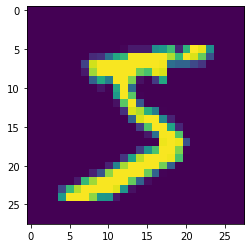

In [ ]:
plt.imshow(x_train[0])

In [ ]:
x_train = tf.cast(x_train, dtype = tf.float32)/255.0
x_test = tf.cast(x_test, dtype=tf.float32)/255.0

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [ ]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)


In [ ]:
print(x_train_noisy.shape)

(60000, 28, 28, 1)


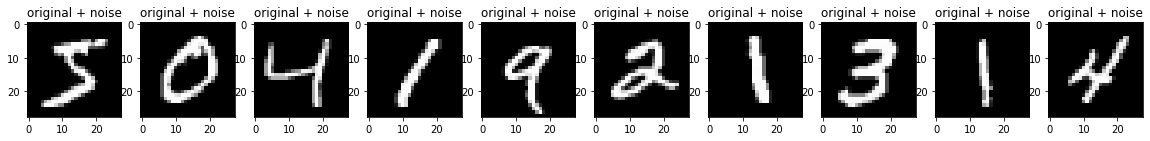

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_train[i]))
    plt.gray()
plt.show()


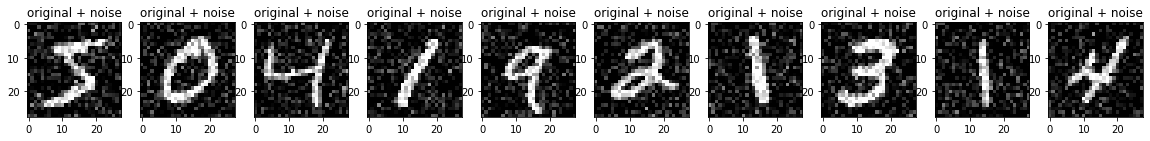

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_train_noisy[i]))
    plt.gray()
plt.show()


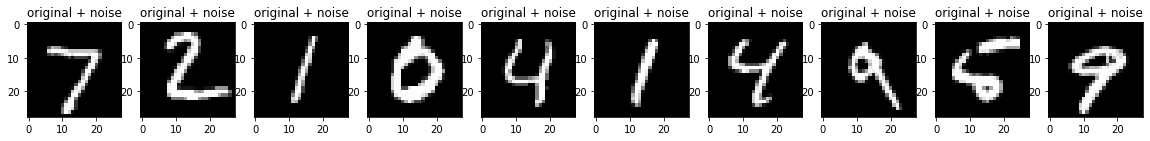

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
plt.show()


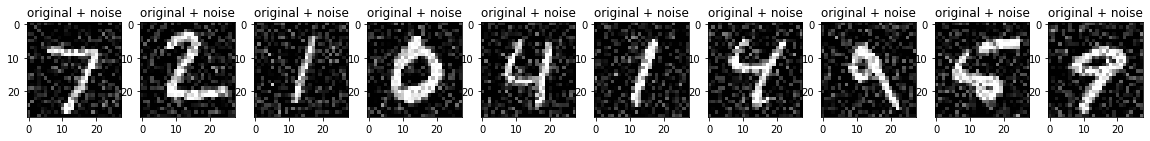

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()


In [ ]:
class Denoise(keras.Model):
    def __init__(self):
        super(Denoise, self).__init__()
        self.encoder_model = keras.models.Sequential([
            keras.Input(shape=(28, 28, 1)),
            keras.layers.Conv2D(64, (3, 3), activation='elu', padding='same'),
            keras.layers.Conv2D(32, (3, 3), activation='elu', padding='same'),
        ])

        self.decoder_model = keras.models.Sequential([
            keras.layers.Conv2DTranspose(32, (3, 3), activation='elu', padding='same'),
            keras.layers.Conv2DTranspose(64, (3, 3), activation='elu', padding='same'),
            keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')
        ])

    def call(self, x):
        encoded = self.encoder_model(x)
        decoded = self.decoder_model(encoded)
        return (decoded)


In [ ]:
denoise = Denoise()
early_stopping = keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')
denoise.compile(optimizer='adam', loss =keras.losses.MeanSquaredError(), metrics=['Accuracy'])
denoise.fit(x_train_noisy, x_train, validation_data=(x_test_noisy, x_test), epochs=100, callbacks=[early_stopping], shuffle=True)

Epoch 1/100
1875/1875 [==============================] - 21s 9ms/step - loss: 0.0039 - Accuracy: 0.8153 - val_loss: 0.0026 - val_Accuracy: 0.8145
Epoch 2/100
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0025 - Accuracy: 0.8155 - val_loss: 0.0024 - val_Accuracy: 0.8145
Epoch 3/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0024 - Accuracy: 0.8155 - val_loss: 0.0024 - val_Accuracy: 0.8145
Epoch 4/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0023 - Accuracy: 0.8155 - val_loss: 0.0023 - val_Accuracy: 0.8145
Epoch 5/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0023 - Accuracy: 0.8155 - val_loss: 0.0023 - val_Accuracy: 0.8145
Epoch 6/100
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0023 - Accuracy: 0.8155 - val_loss: 0.0023 - val_Accuracy: 0.8145
Epoch 7/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0023 - Accuracy: 0.8155 - val_loss: 0.0022 -

<Figure size 864x504 with 0 Axes>

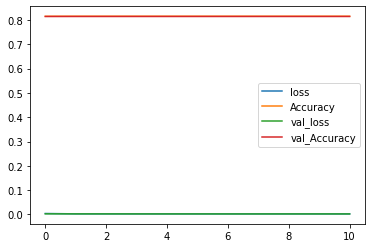

In [ ]:
import pandas as pd 
plt.figure(figsize=(12, 7))
pd.DataFrame(denoise.history.history).plot()

In [ ]:
prediction = denoise.predict(x_train_noisy[0])

In [ ]:
prediction.shape

(28, 28, 1, 1)

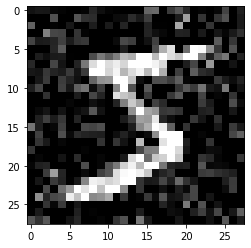

In [ ]:
plt.imshow(tf.squeeze(x_train_noisy[0]))

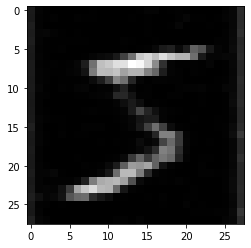

In [ ]:
plt.imshow(tf.squeeze(prediction))